In [1]:
# current future warning with pandas
import warnings
warnings.simplefilter(action ='ignore', category = FutureWarning)

import numpy as np #The Numpy numerical computing library
import pandas as pd #The Pandas data science library
import requests #The requests library for HTTP requests in Python
import xlsxwriter #The XlsxWriter libarary for 
import math #The Python math module
from scipy import stats #The SciPy stats module 
import scipy.stats as sts
import matplotlib.pyplot as plt  
import backtesting as bt
import talib
import csv

# Data

In [2]:
HSI_stock = pd.read_csv('HK50_5M_HKT.csv')
HSI_stock = HSI_stock.rename(columns={'Date':'DateTime'})
HSI_stock.index = pd.to_datetime(HSI_stock['DateTime'])
HSI_stock.drop(columns=['DateTime'], inplace=True)

HSI_stock_is = HSI_stock.loc['2020-05-01':'2022-06-30']
HSI_stock_oos = HSI_stock.loc['2021-07-01':'2023-06-01']
HSI_stock_test = HSI_stock.loc['2023-05-01':'2023-05-31']
HSI_stock_is

,Open,High,Low,Close,Volume
DateTime,,,,,
2020-05-04 09:15:00,23711.3,23836.0,23695.5,23831.7,1774
2020-05-04 09:20:00,23832.1,23833.8,23726.0,23733.3,1545
2020-05-04 09:25:00,23733.5,23766.2,23728.8,23757.7,1409
2020-05-04 09:30:00,23756.8,23831.0,23747.8,23788.0,2177
2020-05-04 09:35:00,23788.0,23812.1,23728.3,23790.0,2146
...,...,...,...,...,...
2022-06-30 23:35:00,21814.0,21835.0,21803.0,21835.0,370
2022-06-30 23:40:00,21837.0,21846.0,21825.0,21841.5,390
2022-06-30 23:45:00,21842.0,21881.5,21839.0,21870.0,417


## FTSE CHINA A50 Index

In [3]:
CHINA50_stock = pd.read_csv('CHINA50_5M_HKT.csv')
CHINA50_stock = CHINA50_stock.rename(columns={'Date':'DateTime'})
CHINA50_stock.index = pd.to_datetime(CHINA50_stock['DateTime'])
CHINA50_stock.drop(columns=['DateTime'], inplace=True)

CHINA50_stock_is = CHINA50_stock.loc['2020-05-01':'2022-06-30']
CHINA50_stock_oos = CHINA50_stock.loc['2021-07-01':'2023-06-01']
CHINA50_stock_test = CHINA50_stock.loc['2023-05-01':'2023-05-31']
CHINA50_stock_is

,Open,High,Low,Close,Volume
DateTime,,,,,
2020-05-01 00:00:00,13243.64,13245.24,13208.64,13210.34,426
2020-05-01 00:05:00,13209.74,13213.64,13198.64,13203.74,407
2020-05-01 00:10:00,13203.84,13205.74,13176.14,13176.14,273
2020-05-01 00:15:00,13176.14,13176.14,13154.84,13156.14,228
2020-05-01 00:20:00,13156.14,13158.64,13148.64,13156.14,242
...,...,...,...,...,...
2022-06-29 20:40:00,14802.81,14811.41,14802.61,14811.41,211
2022-06-29 20:45:00,14811.41,14814.31,14805.31,14805.71,250
2022-06-29 20:50:00,14805.91,14810.41,14804.81,14810.41,136


# Hong Kong China H-share Index

Hang Seng China Enterprises Index

In [4]:
HSCEI_stock = pd.read_csv('CHINAH_5M_HKT.csv')
HSCEI_stock = HSCEI_stock.rename(columns={'Date':'DateTime'})
HSCEI_stock.index = pd.to_datetime(HSCEI_stock['DateTime'])
HSCEI_stock.drop(columns=['DateTime'], inplace=True)

HSCEI_stock_is = HSCEI_stock.loc['2020-05-01':'2022-06-30']
HSCEI_stock_oos = HSCEI_stock.loc['2021-07-01':'2023-06-01']
HSCEI_stock_test = HSCEI_stock.loc['2023-05-01':'2023-05-31']
HSCEI_stock_is

,Open,High,Low,Close,Volume
DateTime,,,,,
2020-05-01 03:15:00,10115.68,10115.68,10115.68,10115.68,1
2020-05-01 09:20:00,10117.26,10117.26,10117.26,10117.26,1
2020-05-01 23:15:00,10032.99,10117.26,10032.99,10117.26,2
2020-05-02 01:40:00,10117.26,10117.26,10117.26,10117.26,1
2020-05-02 03:25:00,10114.86,10114.86,10114.86,10114.86,1
...,...,...,...,...,...
2022-06-29 20:40:00,7690.37,7697.37,7690.37,7697.37,144
2022-06-29 20:45:00,7697.37,7699.37,7694.37,7695.37,82
2022-06-29 20:50:00,7695.37,7698.37,7695.37,7696.37,79


In [5]:
test = pd.concat([HSI_stock['Close'], CHINA50_stock['Close'], HSCEI_stock['Close']], axis="columns")
test.dropna(inplace=True)
test.columns = ['HSI', 'CHINA50', 'HSCEI']
test

,HSI,CHINA50,HSCEI
DateTime,,,
2017-12-12 05:00:00,28946.0,13265.00,11286.00
2017-12-18 05:00:00,28922.0,12918.00,11480.00
2018-01-02 05:00:00,29938.0,13178.00,12056.00
2018-01-08 05:00:00,30869.0,13573.00,12204.00
2018-01-11 05:00:00,31018.2,13858.00,12308.00
...,...,...,...
2022-06-29 20:40:00,22000.5,14811.41,7697.37
2022-06-29 20:45:00,22000.0,14805.71,7695.37
2022-06-29 20:50:00,22007.0,14810.41,7696.37


## Canada 60 Index

In [6]:
CA60_index = pd.read_csv("./Indexies/CA60_5M_HKT.csv")
CA60_index.index = pd.to_datetime(CA60_index['Date'])
CA60_index

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2020-04-29 21:30:00,2020-04-29 21:30:00,911.89,911.89,907.84,908.69,314
2020-04-29 21:35:00,2020-04-29 21:35:00,908.79,909.49,906.24,907.24,249
2020-04-29 21:40:00,2020-04-29 21:40:00,907.34,908.44,906.69,908.39,187
2020-04-29 21:45:00,2020-04-29 21:45:00,908.44,910.18,908.29,909.97,225
2020-04-29 21:50:00,2020-04-29 21:50:00,909.92,911.36,909.71,910.60,226
...,...,...,...,...,...,...
2022-06-29 03:50:00,2022-06-29 03:50:00,1166.10,1167.48,1165.45,1167.43,241
2022-06-29 03:55:00,2022-06-29 03:55:00,1167.33,1167.33,1165.66,1166.70,224
2022-06-29 04:00:00,2022-06-29 04:00:00,1166.65,1166.90,1165.16,1165.55,131


## Netherlands 25 index

In [7]:
NETH25_index = pd.read_csv("./Indexies/NETH25_5M_HKT.csv")
NETH25_index.index = pd.to_datetime(NETH25_index['Date'])
NETH25_index

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2017-05-02 05:00:00,2017-05-02 05:00:00,521.10,526.00,521.03,525.40,8580
2017-05-03 05:00:00,2017-05-03 05:00:00,524.50,525.98,523.48,525.66,9054
2017-05-04 05:00:00,2017-05-04 05:00:00,524.90,528.55,524.90,528.37,13607
2017-05-05 05:00:00,2017-05-05 05:00:00,526.80,534.72,526.45,534.65,14112
2017-05-08 05:00:00,2017-05-08 05:00:00,534.55,535.53,531.35,534.45,14098
...,...,...,...,...,...,...
2022-06-29 20:40:00,2022-06-29 20:40:00,664.14,665.27,664.06,665.21,189
2022-06-29 20:45:00,2022-06-29 20:45:00,665.21,665.95,664.72,665.51,161
2022-06-29 20:50:00,2022-06-29 20:50:00,665.56,666.16,665.56,665.77,148


## Sweden 30

In [8]:
SE30_index = pd.read_csv("./Indexies/SE30_5M_HKT.csv")
SE30_index.index = pd.to_datetime(SE30_index['Date'])
SE30_index

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2020-04-20 15:00:00,2020-04-20 15:00:00,1551.22,1551.22,1542.25,1544.63,258
2020-04-20 15:05:00,2020-04-20 15:05:00,1544.75,1547.25,1540.12,1541.87,238
2020-04-20 15:10:00,2020-04-20 15:10:00,1541.75,1542.37,1537.00,1537.75,172
2020-04-20 15:15:00,2020-04-20 15:15:00,1537.87,1537.87,1531.32,1531.57,171
2020-04-20 15:20:00,2020-04-20 15:20:00,1531.44,1534.11,1529.79,1533.35,191
...,...,...,...,...,...,...
2022-06-29 20:40:00,2022-06-29 20:40:00,1901.98,1903.96,1901.36,1903.71,129
2022-06-29 20:45:00,2022-06-29 20:45:00,1903.46,1905.43,1902.71,1904.31,137
2022-06-29 20:50:00,2022-06-29 20:50:00,1904.31,1905.44,1903.93,1904.30,94


In [9]:


SA40_index = pd.read_csv("./Indexies/SA40_5M_HKT.csv")
SA40_index.index = pd.to_datetime(SA40_index['Date'])

NOR25_index = pd.read_csv("./Indexies/NOR25_5M_HKT.csv")
NOR25_index.index = pd.to_datetime(NOR25_index['Date'])

ES35_index = pd.read_csv("./Indexies/ES35_5M_HKT.csv")
ES35_index.index = pd.to_datetime(ES35_index['Date'])

US2000_index = pd.read_csv("./Indexies/US2000_5M_HKT.csv")
US2000_index.index = pd.to_datetime(US2000_index['Date'])

MIDDE60_index = pd.read_csv("./Indexies/MIDDE60_5M_HKT.csv")
MIDDE60_index.index = pd.to_datetime(MIDDE60_index['Date'])

# Pairs Trading testing


In [10]:
test = pd.concat([HSI_stock['Close'], CA60_index['Close'], NETH25_index['Close'], SE30_index['Close'], SA40_index['Close'], NOR25_index['Close'], ES35_index['Close'], US2000_index['Close'], MIDDE60_index['Close']], axis="columns")
test.dropna(inplace=True)
test.columns = ['HSI', 'CA60', 'NETH25', 'SE30', 'SA40', 'NOR25', 'ES35', 'US2000', 'MIDDE60']
test

,HSI,CA60,NETH25,SE30,SA40,NOR25,ES35,US2000,MIDDE60
2020-04-29 21:30:00,24780.4,908.69,523.56,1597.37,46620.4,706.31,6993.8,1332.76,23248.91
2020-04-29 21:35:00,24753.3,907.24,523.00,1593.96,46564.1,705.23,6981.9,1326.40,23225.22
2020-04-29 21:40:00,24749.4,908.39,523.32,1594.02,46590.8,706.00,6981.8,1331.41,23224.12
2020-04-29 21:45:00,24757.9,909.97,523.66,1597.53,46712.0,705.59,6985.1,1335.07,23242.86
2020-04-29 21:50:00,24769.4,910.60,524.36,1600.36,46729.9,705.76,6986.2,1337.42,23257.11
...,...,...,...,...,...,...,...,...,...
2022-06-28 21:50:00,22561.7,1183.46,675.51,1925.30,62107.6,1103.53,8360.0,1792.44,27397.00
2022-06-28 21:55:00,22561.7,1183.53,674.48,1927.42,62083.9,1104.38,8353.1,1788.19,27349.80
2022-06-28 22:00:00,22537.7,1180.91,673.41,1922.72,62049.5,1104.81,8343.2,1783.34,27292.90
2022-06-28 22:05:00,22520.7,1181.07,672.75,1919.63,62027.8,1104.89,8324.4,1779.24,27245.40


In [11]:
corr_matrix = test.corr()
corr_matrix

,HSI,CA60,NETH25,SE30,SA40,NOR25,ES35,US2000,MIDDE60
HSI,1.000000,-0.244473,0.028381,0.173049,-0.110499,-0.274028,0.197548,0.387067,0.277051
CA60,-0.244473,1.000000,0.916949,0.863102,0.926223,0.978194,0.828854,0.762695,0.795881
NETH25,0.028381,0.916949,1.000000,0.958609,0.826950,0.881671,0.905373,0.881238,0.943418
SE30,0.173049,0.863102,0.958609,1.000000,0.801577,0.810167,0.896198,0.916252,0.968492
SA40,-0.110499,0.926223,0.826950,0.801577,1.000000,0.916737,0.784167,0.754938,0.728896
NOR25,-0.274028,0.978194,0.881671,0.810167,0.916737,1.000000,0.832695,0.729144,0.733158
ES35,0.197548,0.828854,0.905373,0.896198,0.784167,0.832695,1.000000,0.888382,0.877959
US2000,0.387067,0.762695,0.881238,0.916252,0.754938,0.729144,0.888382,1.000000,0.934900
MIDDE60,0.277051,0.795881,0.943418,0.968492,0.728896,0.733158,0.877959,0.934900,1.000000


<Axes: >

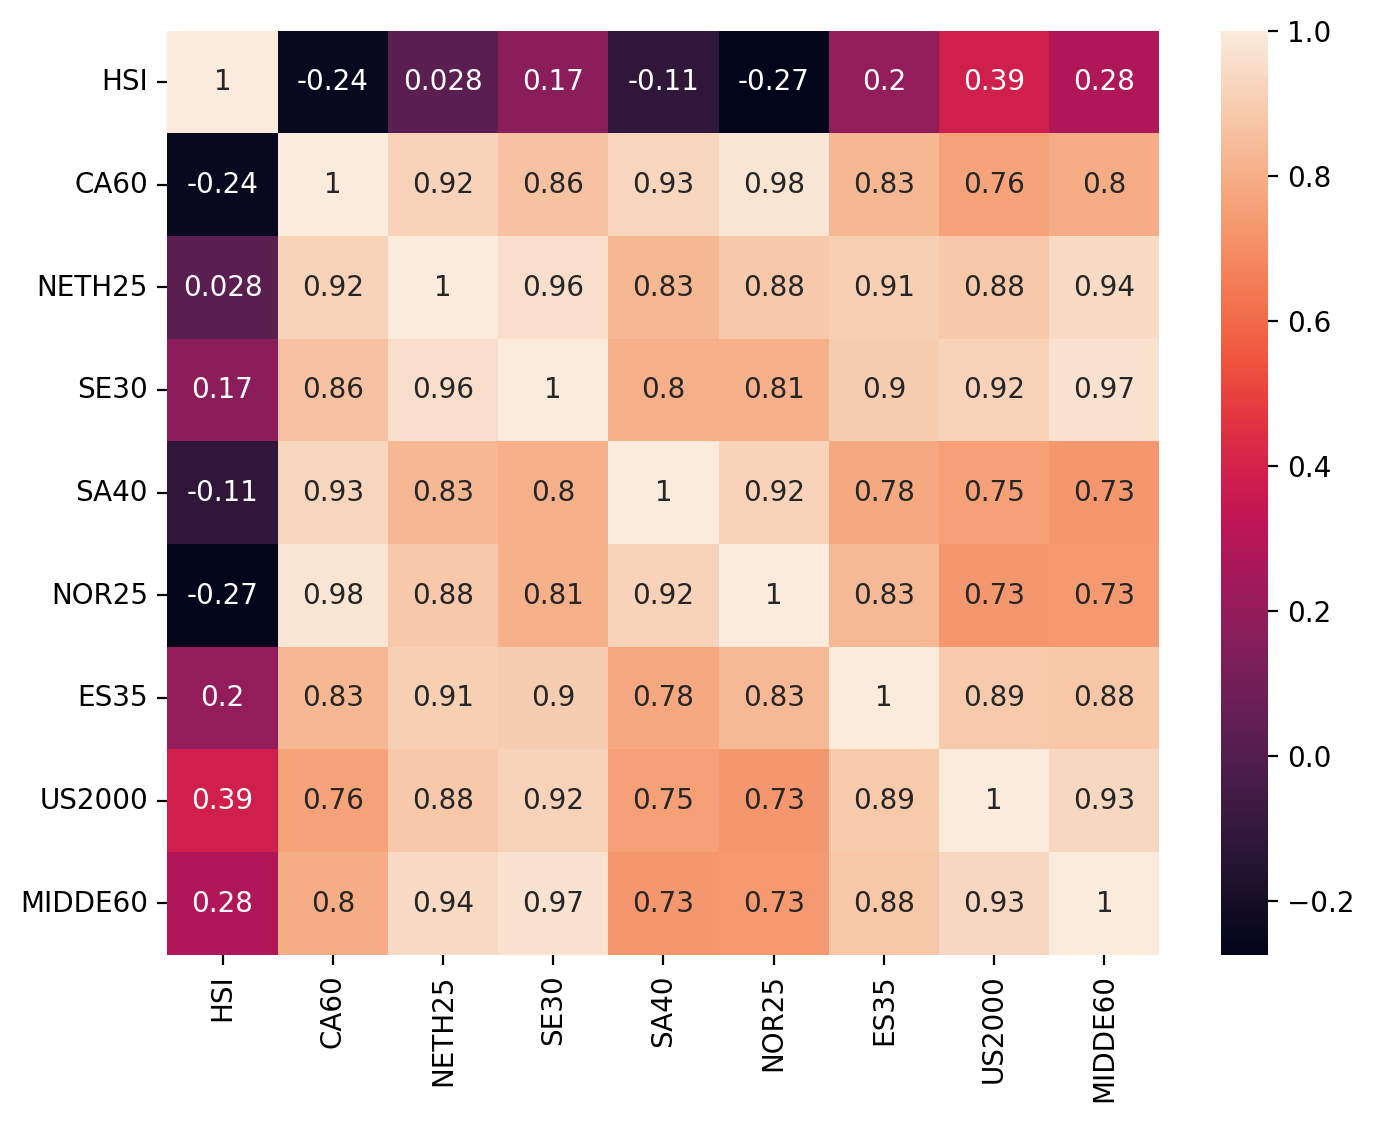

In [12]:
# Let's heatmap this matrix so that we can have a better sense of what is going on
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=200)
sn.heatmap(corr_matrix, annot = True)

In [13]:
import matplotlib.pyplot as plt
figure(figsize=(8, 6), dpi=200)
HSI = test['HSI'] 
HSCEI = test['HSCEI']
# HOWEVER, let's check out the relationship between the stocks...
plt.plot(HSI, label = "HSI")
plt.plot(HSCEI, label = "HSCEI")
plt.legend()

KeyError: 'HSCEI'

<Figure size 1600x1200 with 0 Axes>

In [14]:
join_index = pd.concat([SE30_index['Close'], US2000_index['Close']], axis="columns")
join_index.dropna(inplace=True)
join_index.columns = ['SE30', 'US2000']

SE = join_index['SE30']*20
US2000 = join_index['US2000']*21
ratio = US2000 / SE

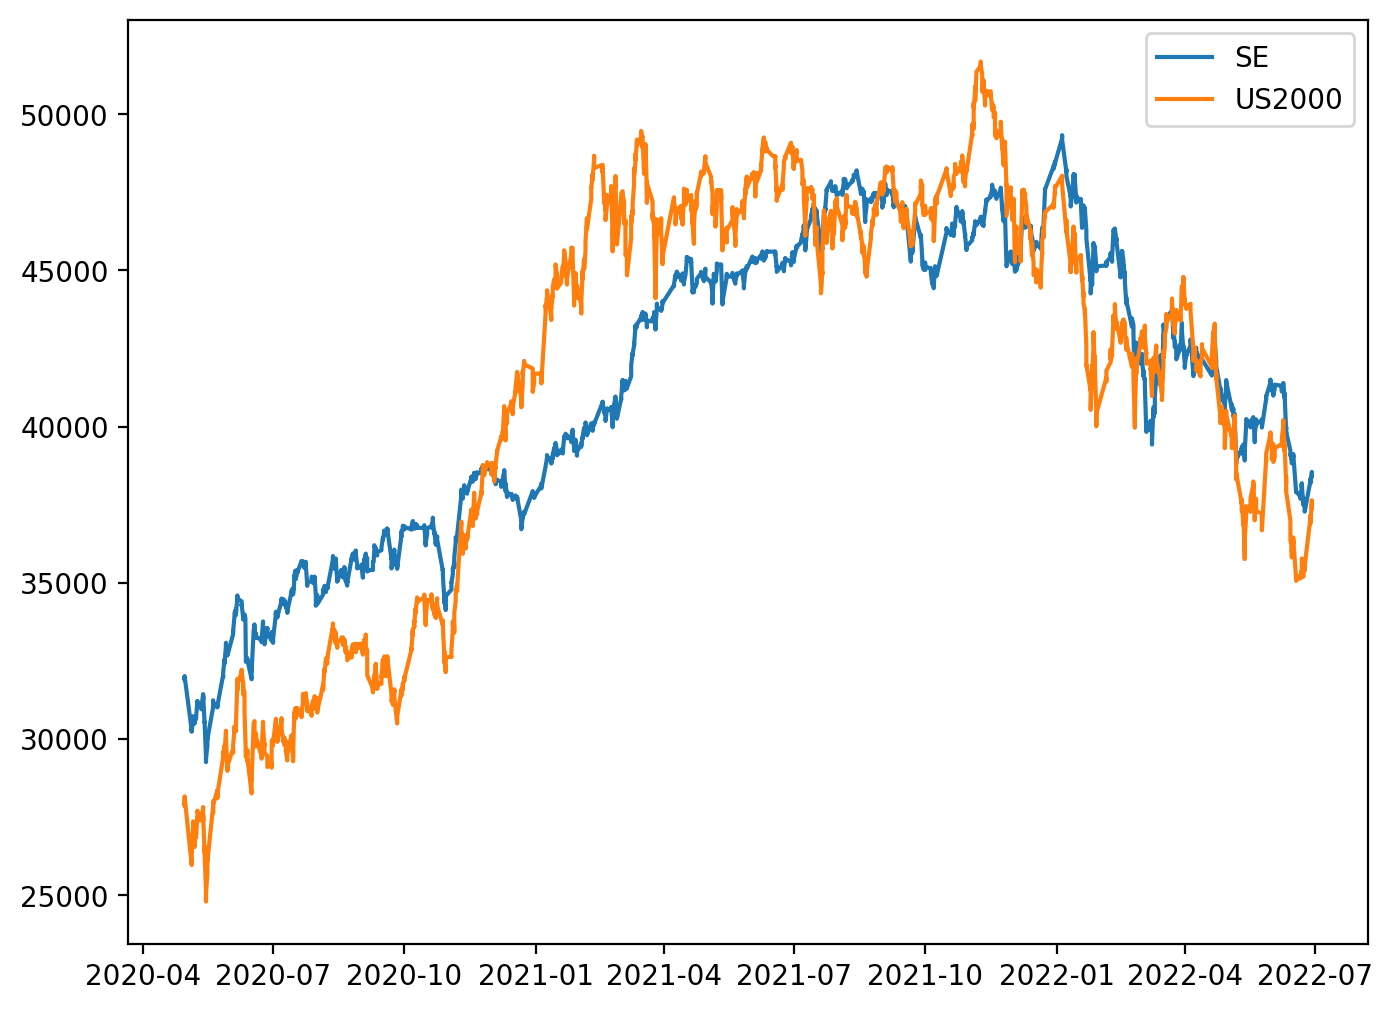

In [15]:
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=200)
MIDDE = test['MIDDE60']
SE = test['SE30']*20
US2000 = test['US2000']*21 # 16 to match with SE
# NETH = test['NETH25']*50
# SE = test['CHINA50'] 
# HOWEVER, let's check out the relationship between the stocks...
# plt.plot(MIDDE, label = "MIDDE")
plt.plot(SE, label = "SE")
plt.plot(US2000, label = "US2000")
plt.legend()

Text(0.5, 1.0, 'Spread between SE and US2000')

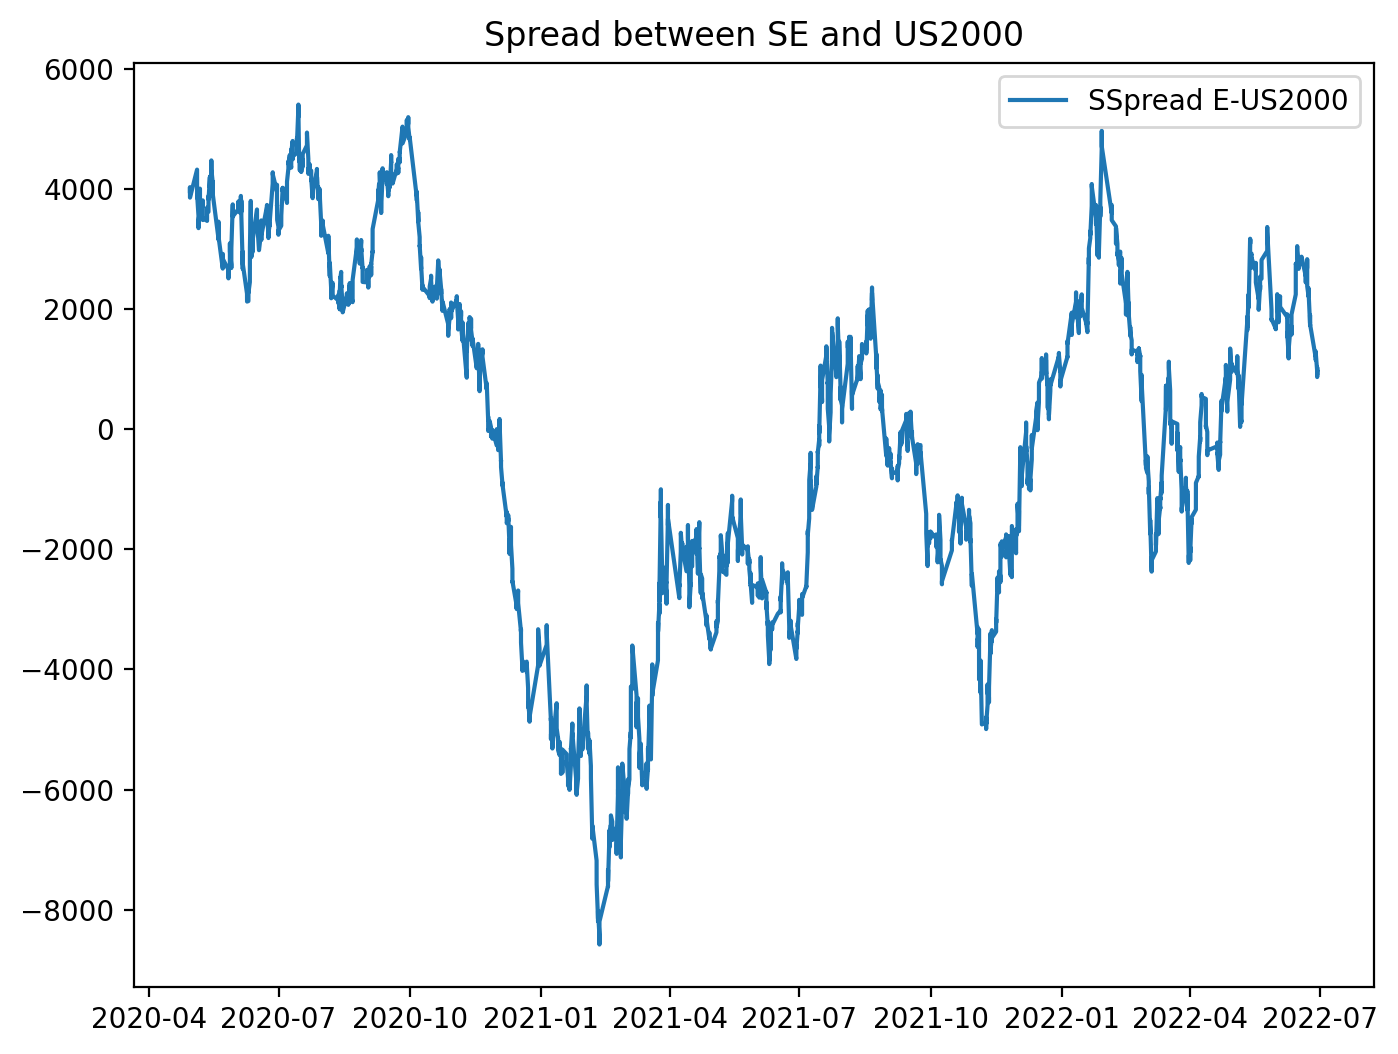

In [16]:
figure(figsize=(8, 6), dpi=200)
plt.plot(SE-US2000, label = "SSpread E-US2000")
plt.legend()
plt.title("Spread between SE and US2000")

# Cointegration test

To check if there is any long term relationship between the two index

In [18]:
# Check out the cointegration value: Null hyp. = no cointegration
import statsmodels.tsa.stattools as ts 
result = ts.coint(US2000, SE)

In [19]:
# Determines if the spread between the two assets are constant over time.
# Null Hypothesis: Spread between series are non-stationary.
# Uses the augmented Engle-Granger two-step cointegration test.
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('We want the P val < 0.05 (meaning that cointegration exists)')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.4768648303690769


### ADF Augmented Dickey-Fuller test

Used to check for the presence of a unit root in a time series variable. Which implies that the variable is non-stationary

In [20]:
from statsmodels.tsa.stattools import adfuller
# Compute the ADF test for US2000 and SE
# With all time series, you want to have stationary data otherwise our data will be very hard to predict.

US2000_ADF = adfuller(US2000)
print('P value for the Augmented Dickey-Fuller Test is', US2000_ADF[1])
SE_ADF = adfuller(SE)
print('P value for the Augmented Dickey-Fuller Test is', SE_ADF[1])
Spread_ADF = adfuller(US2000 - SE)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])
Ratio_ADF = adfuller(US2000 / SE)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])
# Spread looks fine. If you'd want even better results, consider taking the difference (order 1) of Berkshire and MSFT

# Results: can only claim stationary for the spread (since P value < 0.05). This suggests a constant mean over time.
# Therefore, the two series are cointegrated.

P value for the Augmented Dickey-Fuller Test is 0.32854655128178784
P value for the Augmented Dickey-Fuller Test is 0.360000744865607
P value for the Augmented Dickey-Fuller Test is 0.2750999264748946
P value for the Augmented Dickey-Fuller Test is 0.2670679568906491


Text(0.5, 1.0, 'Price Ratio between US2000 and SE')

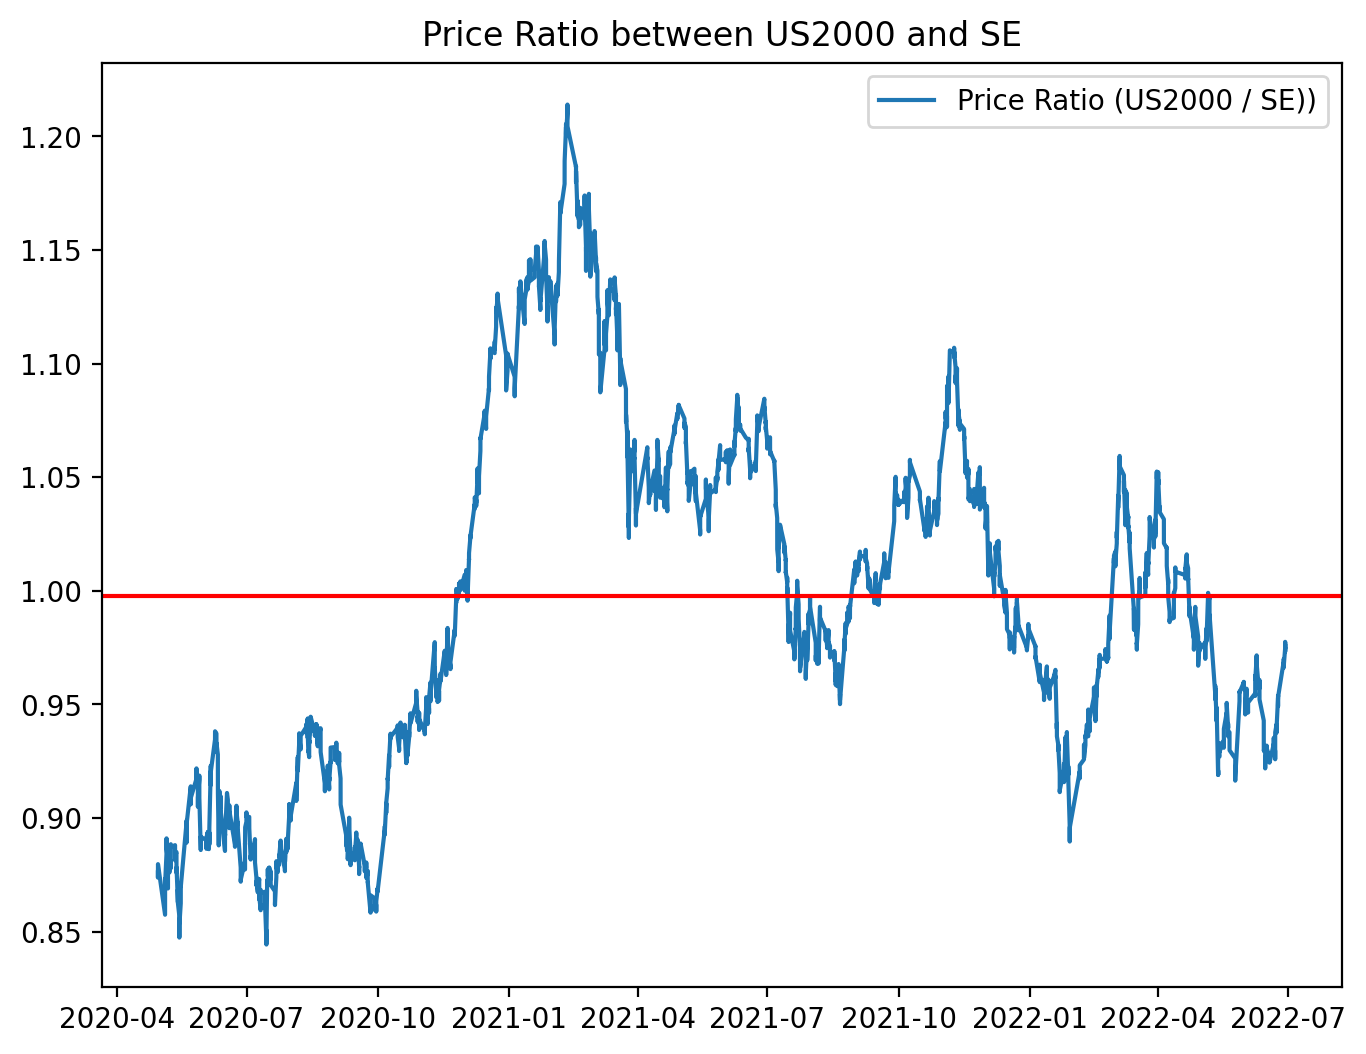

In [21]:
# Also, we can take a look at the price ratios between the two time series.
figure(figsize=(8, 6), dpi=200)
ratio = US2000 / SE
plt.plot(ratio, label = 'Price Ratio (US2000 / SE))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between US2000 and SE")

In [21]:

ratio

Date
2020-04-20 15:00:00    0.827857
2020-04-20 15:05:00    0.829645
2020-04-20 15:10:00    0.830980
2020-04-20 15:15:00    0.833099
2020-04-20 15:20:00    0.832954
                         ...   
2022-06-29 20:40:00    0.957681
2022-06-29 20:45:00    0.957021
2022-06-29 20:50:00    0.957384
2022-06-29 20:55:00    0.956787
2022-06-29 21:00:00    0.957790
Length: 55016, dtype: float64

## Z ratio

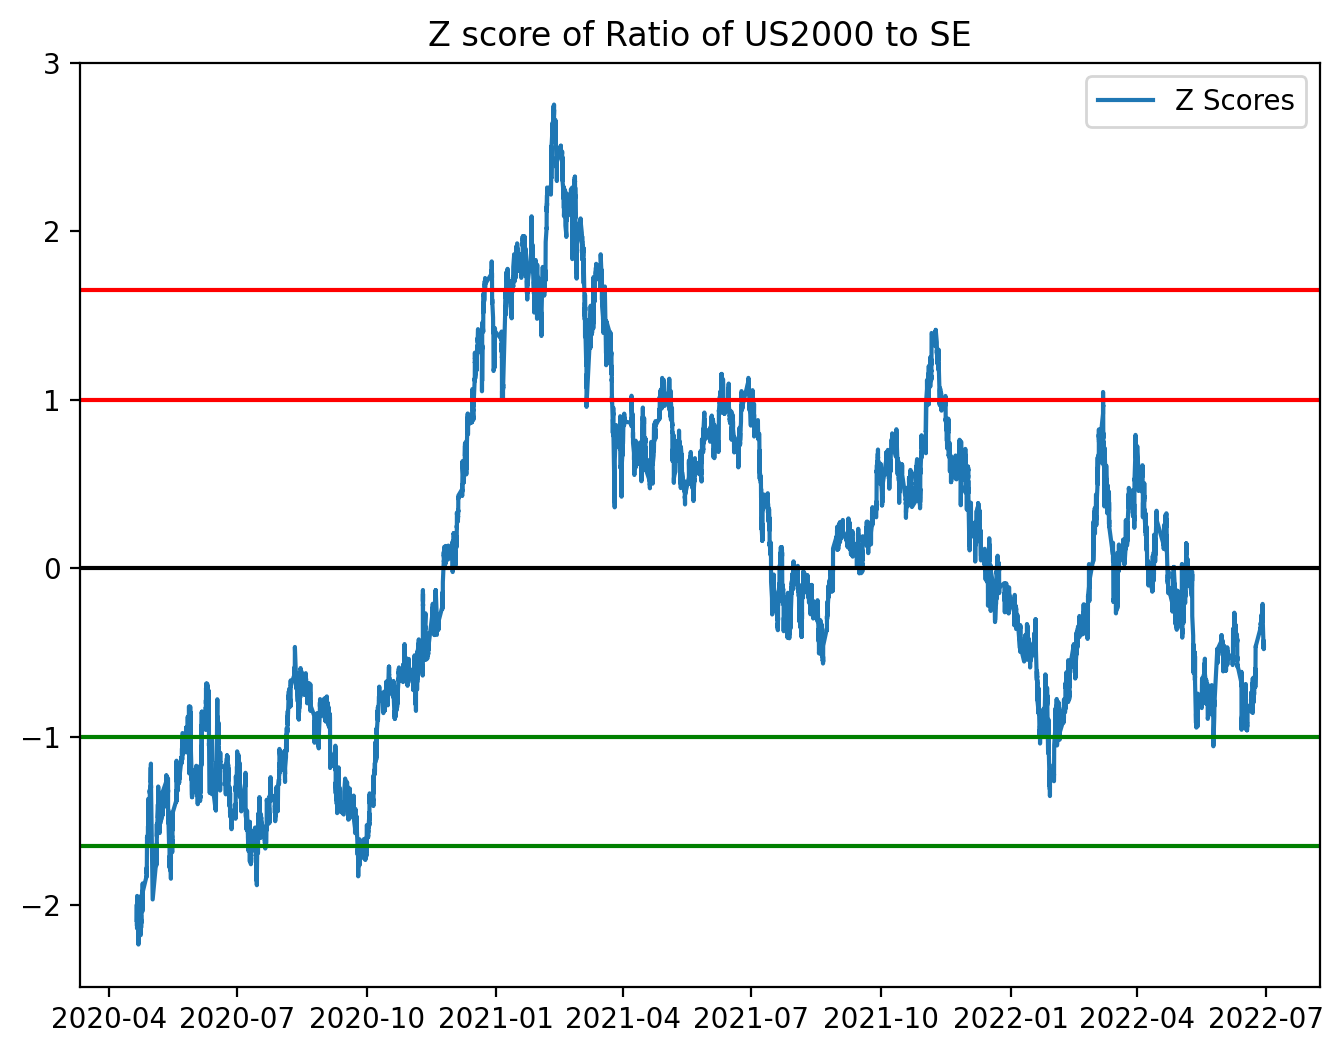

In [17]:
# NOTE, here you can either use the spread OR the Price ratio approach. Anyways, let's standardize the ratio so we can have a 
# upper and lower bound to help evaluate our trends.. Let's stick with the ratio data.
figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.65, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.65, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of US2000 to SE')
plt.show()
# For the most part, the range that exists outside of these 'bands' must come converge back to the mean. Thus, you can 
# determine when you can go long or short the pair (US2000 to SE).

In [18]:

# That's cool.. so when do we actually start trading? We need some form of 'signal' to trade (and to trade)
# This is where it can become an 'artform' AND a probability game.

# You could split 80 / 20 for train and test, BUT we are not going to be backtesting since we are just going over the model.
# train = ratio[0:round(0.8*len(ratio))]
# test = ratio[round(0.8*len(ratio)):]
# print('Do the splits check out?',len(train) + len(test) == len(ratio))

## Determination of Signals

Used simple moving average to determined whether to buy or sell

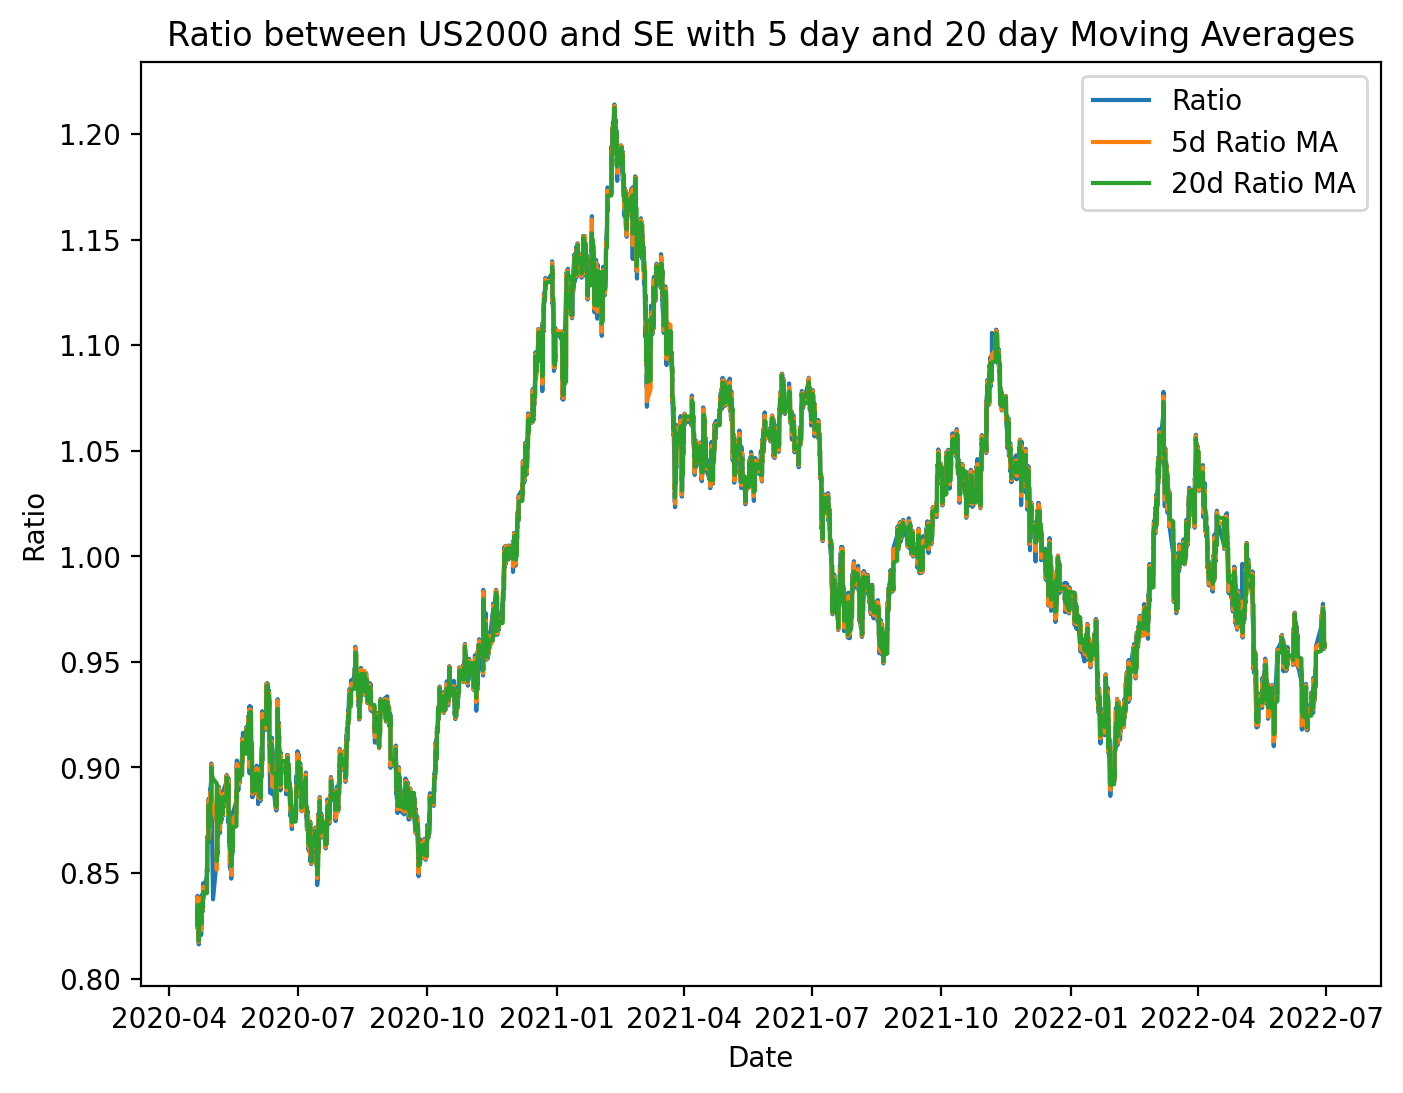

In [22]:
figure(figsize=(8, 6), dpi=200)
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Ratio between US2000 and SE with 5 day and 20 day Moving Averages')
plt.show()

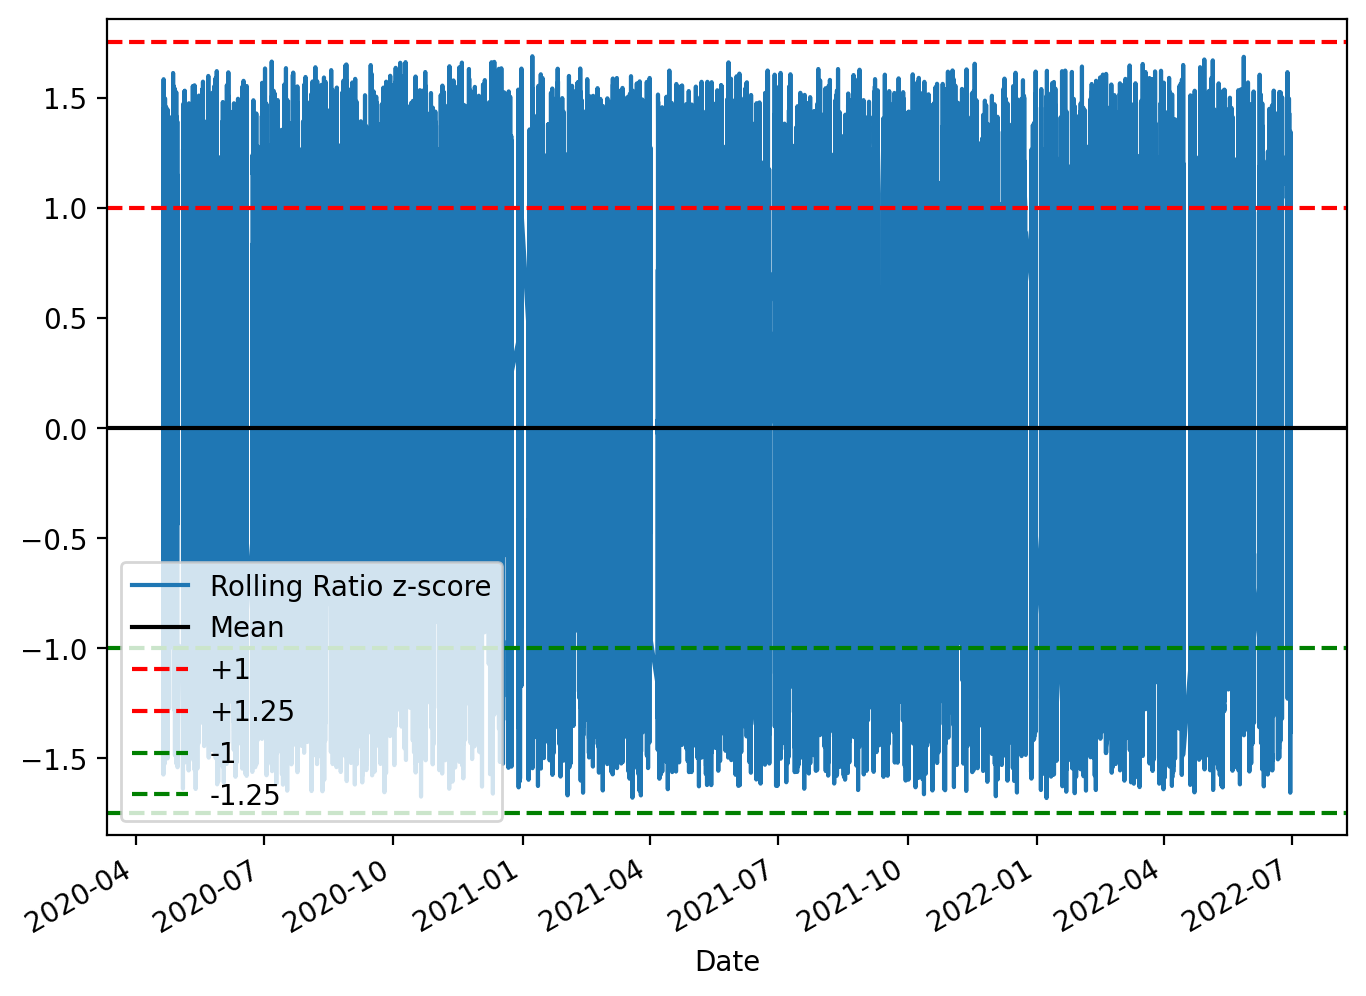

In [26]:
figure(figsize=(8, 6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.5, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.5, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

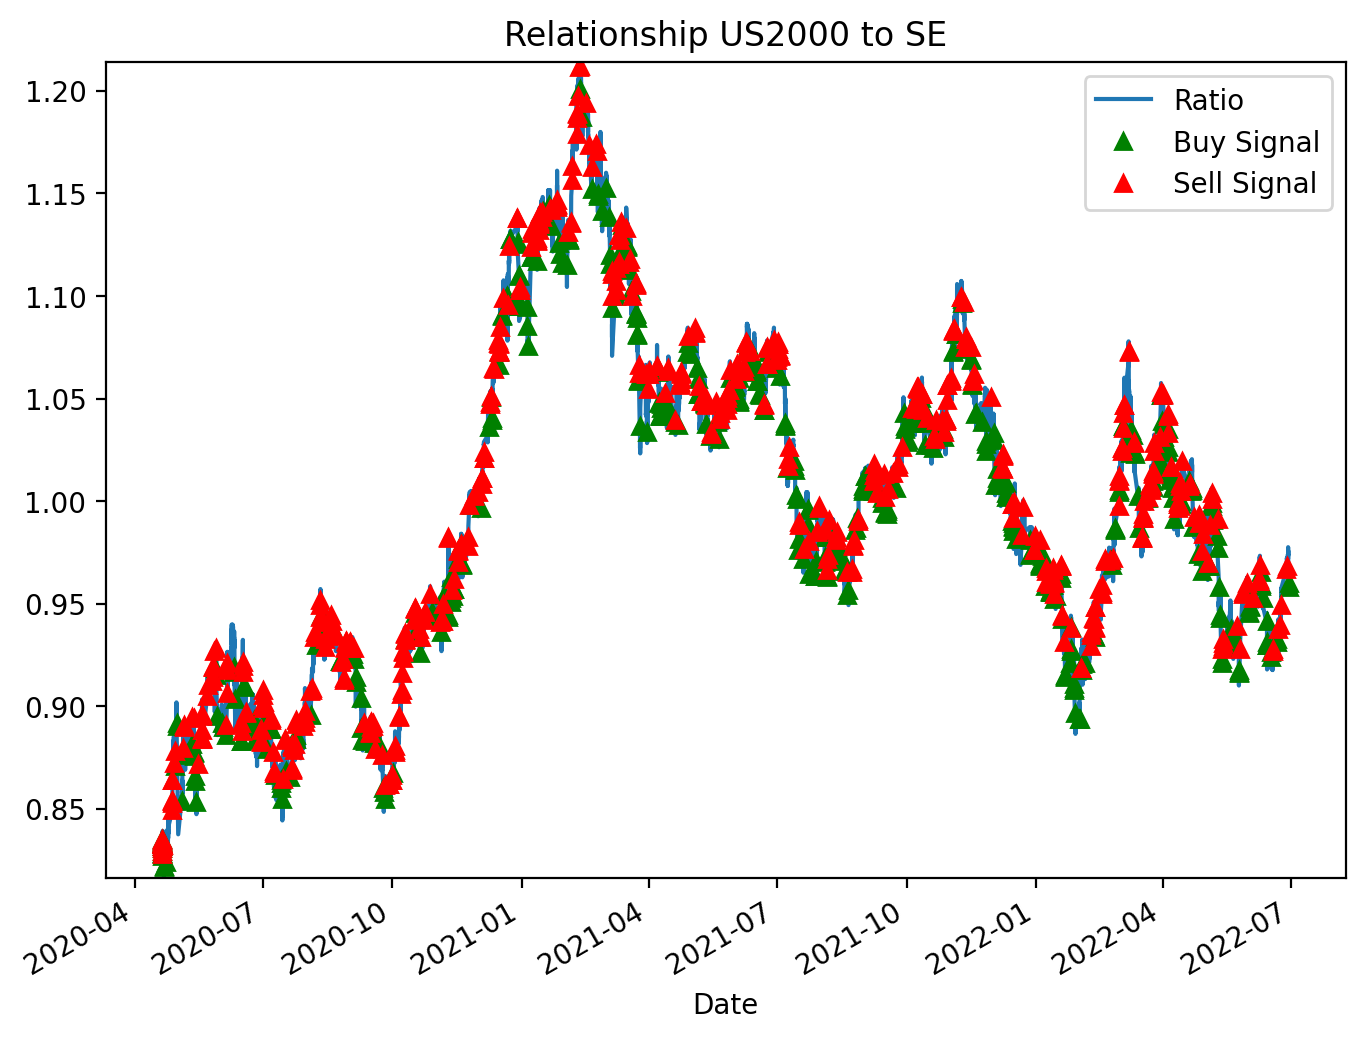

In [33]:
figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1.5] = 0
sell[zscore_20_5<1.5] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship US2000 to SE')
plt.show()

## Ratio with Bollinger bands

In [30]:
join_index = pd.concat([SE30_index['Close'], US2000_index['Close']], axis="columns")
join_index.dropna(inplace=True)
join_index.columns = ['SE30', 'US2000']
print(join_index)
SE = join_index['SE30']*20
US2000 = join_index['US2000']*21
ratio = US2000 / SE
ratio

                        SE30   US2000
Date                                 
2020-04-20 15:00:00  1544.63  1217.84
2020-04-20 15:05:00  1541.87  1218.29
2020-04-20 15:10:00  1537.75  1216.99
2020-04-20 15:15:00  1531.57  1215.19
2020-04-20 15:20:00  1533.35  1216.39
...                      ...      ...
2022-06-29 20:40:00  1903.71  1736.33
2022-06-29 20:45:00  1904.31  1735.68
2022-06-29 20:50:00  1904.30  1736.33
2022-06-29 20:55:00  1904.50  1735.43
2022-06-29 21:00:00  1904.37  1737.13

[55016 rows x 2 columns]


Date
2020-04-20 15:00:00    0.827857
2020-04-20 15:05:00    0.829645
2020-04-20 15:10:00    0.830980
2020-04-20 15:15:00    0.833099
2020-04-20 15:20:00    0.832954
                         ...   
2022-06-29 20:40:00    0.957681
2022-06-29 20:45:00    0.957021
2022-06-29 20:50:00    0.957384
2022-06-29 20:55:00    0.956787
2022-06-29 21:00:00    0.957790
Length: 55016, dtype: float64

Text(0.5, 1.0, 'Price Ratio between US2000 and SE')

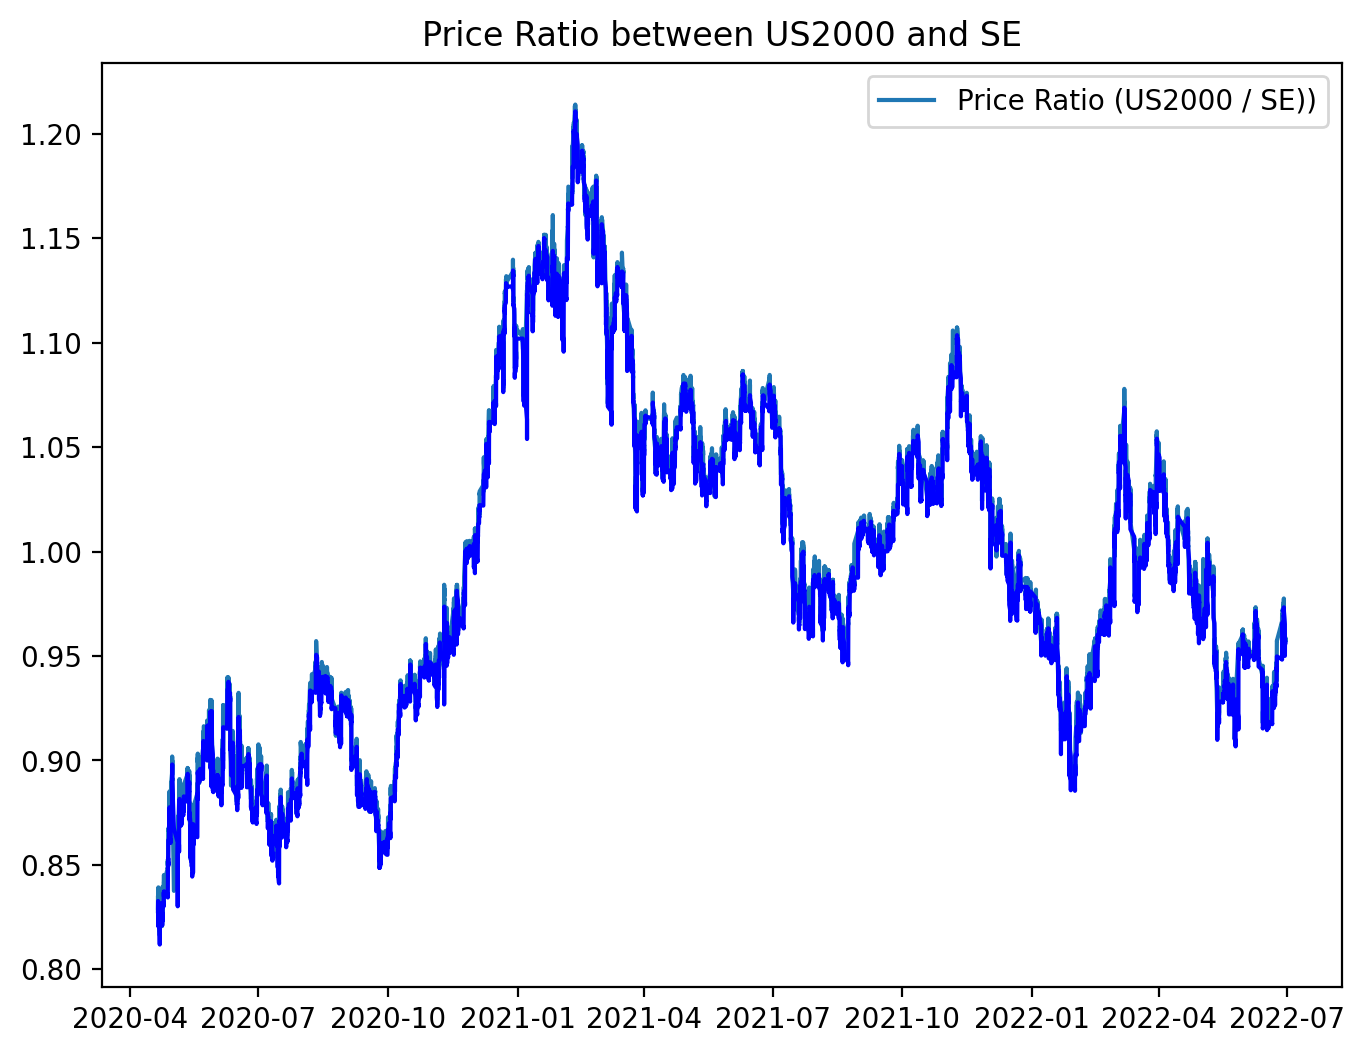

In [31]:
import talib

figure(figsize=(8, 6), dpi=200)
ratio = US2000 / SE

# BBANDS
upperband, middleband, lowerband = talib.BBANDS(ratio, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
upperband.dropna(inplace=True)
middleband.dropna(inplace=True)
lowerband.dropna(inplace=True)

plt.plot(ratio, label = 'Price Ratio (US2000 / SE))')
#plt.plot(upperband, color='green')
#plt.plot(middleband, color='black')
plt.plot(lowerband, color='blue')
# plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between US2000 and SE")

Text(0.5, 1.0, 'Price Ratio between US2000 and SE')

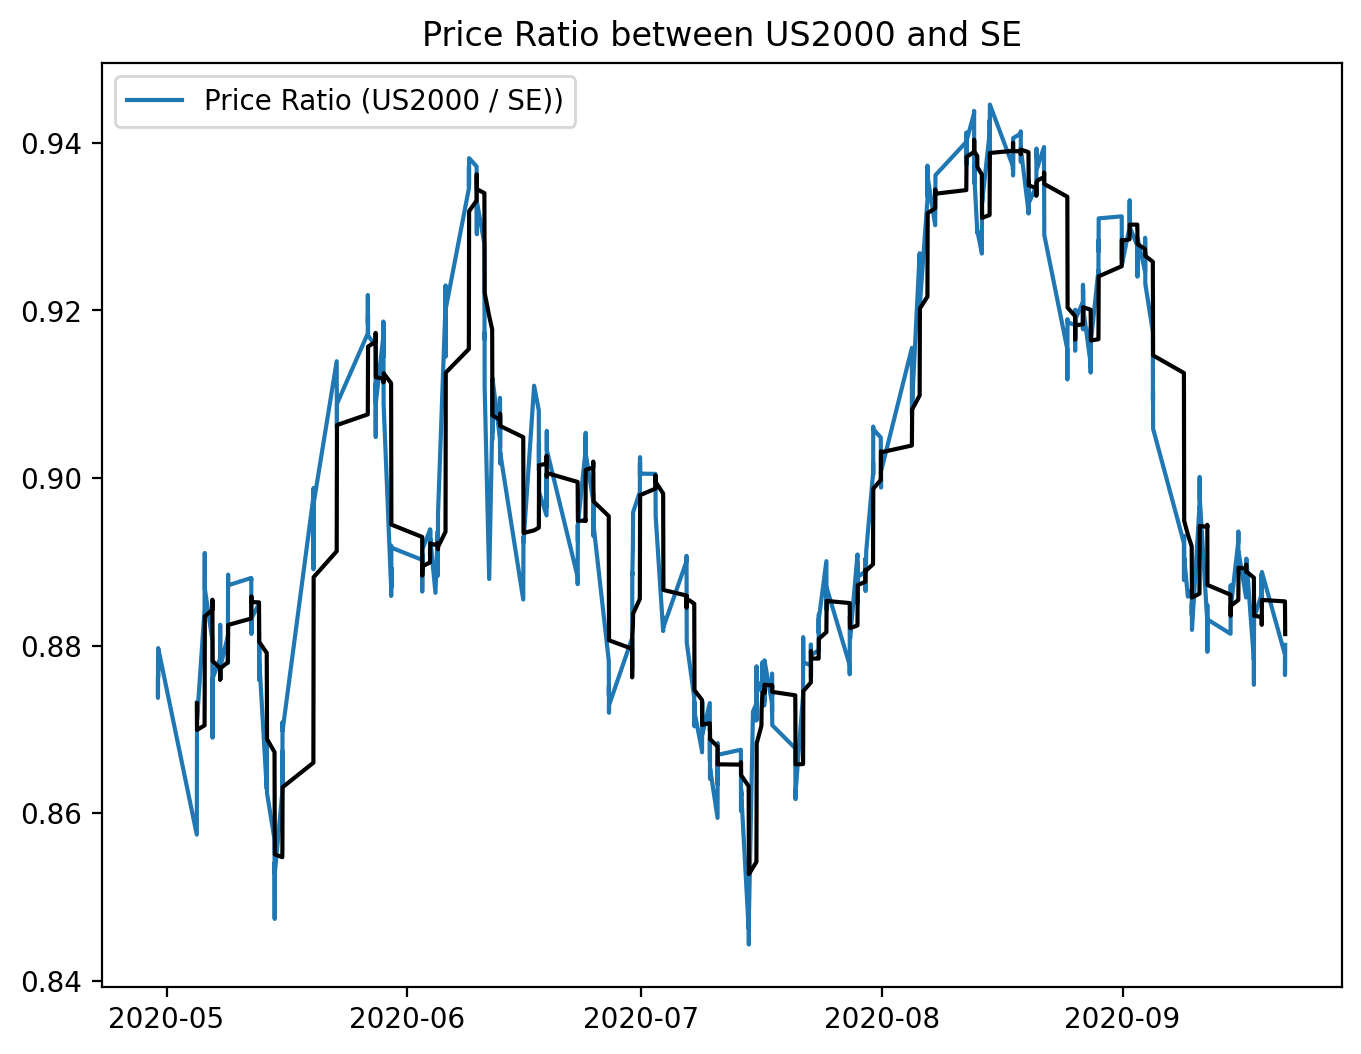

In [45]:
import talib

figure(figsize=(8, 6), dpi=200)
ratio = US2000 / SE
s_ratio = ratio.iloc[:1000]

# BBANDS
upperband, middleband, lowerband = talib.BBANDS(s_ratio, timeperiod=15, nbdevup=3, nbdevdn=3, matype=0)
upperband.dropna(inplace=True)
middleband.dropna(inplace=True)
lowerband.dropna(inplace=True)
avg = talib.SMA(s_ratio, timeperiod=25)

plt.plot(s_ratio, label = 'Price Ratio (US2000 / SE))')
# plt.plot(upperband, color='green')
plt.plot(middleband, color='black')
# plt.plot(avg, color='red')
# plt.plot(lowerband, color='blue')
# plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between US2000 and SE")

In [33]:
# BBANDS
upperband, middleband, lowerband = talib.BBANDS(ratio, timeperiod=25, nbdevup=3, nbdevdn=3, matype=0)
# upperband.dropna(inplace=True)
# middleband.dropna(inplace=True)
# lowerband.dropna(inplace=True)

In [33]:
t = ratio - lowerband
t2 = ratio - upperband
cnt = (t2>0).sum()
cnt2 = (t<0).sum()
print(cnt, cnt2)

323 329


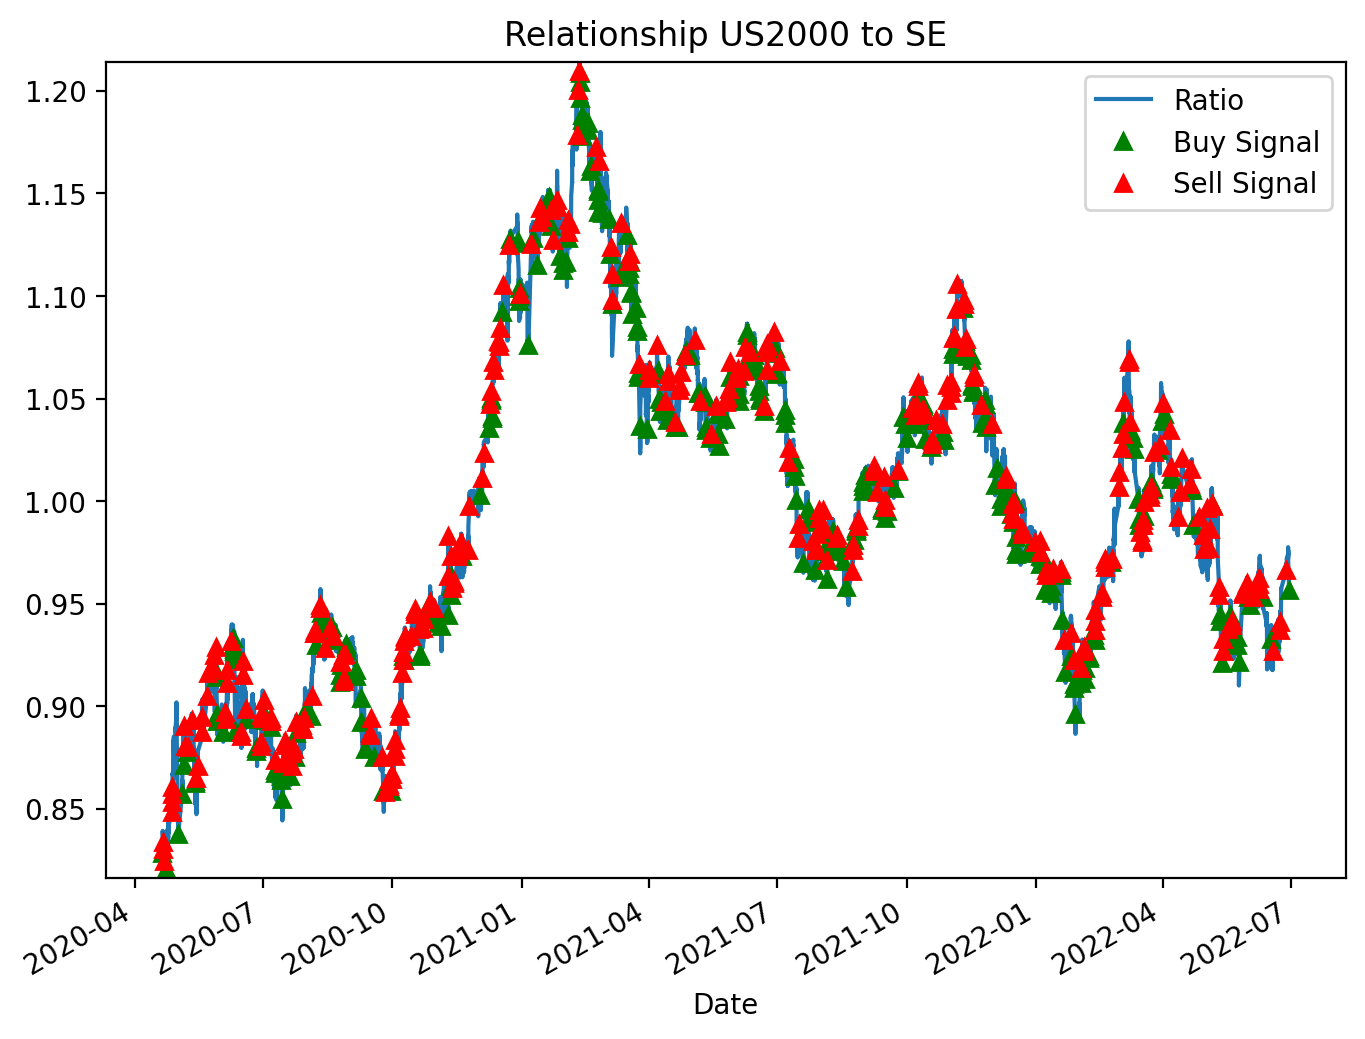

In [34]:
figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = (ratio.copy()-lowerband.copy())<0
sell = (ratio.copy() - upperband.copy())>0
buy.loc[buy == False] = 0
sell.loc[sell == False] = 0
buy.loc[buy == True] = ratio
sell.loc[sell == True] = ratio
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship US2000 to SE')
plt.show()

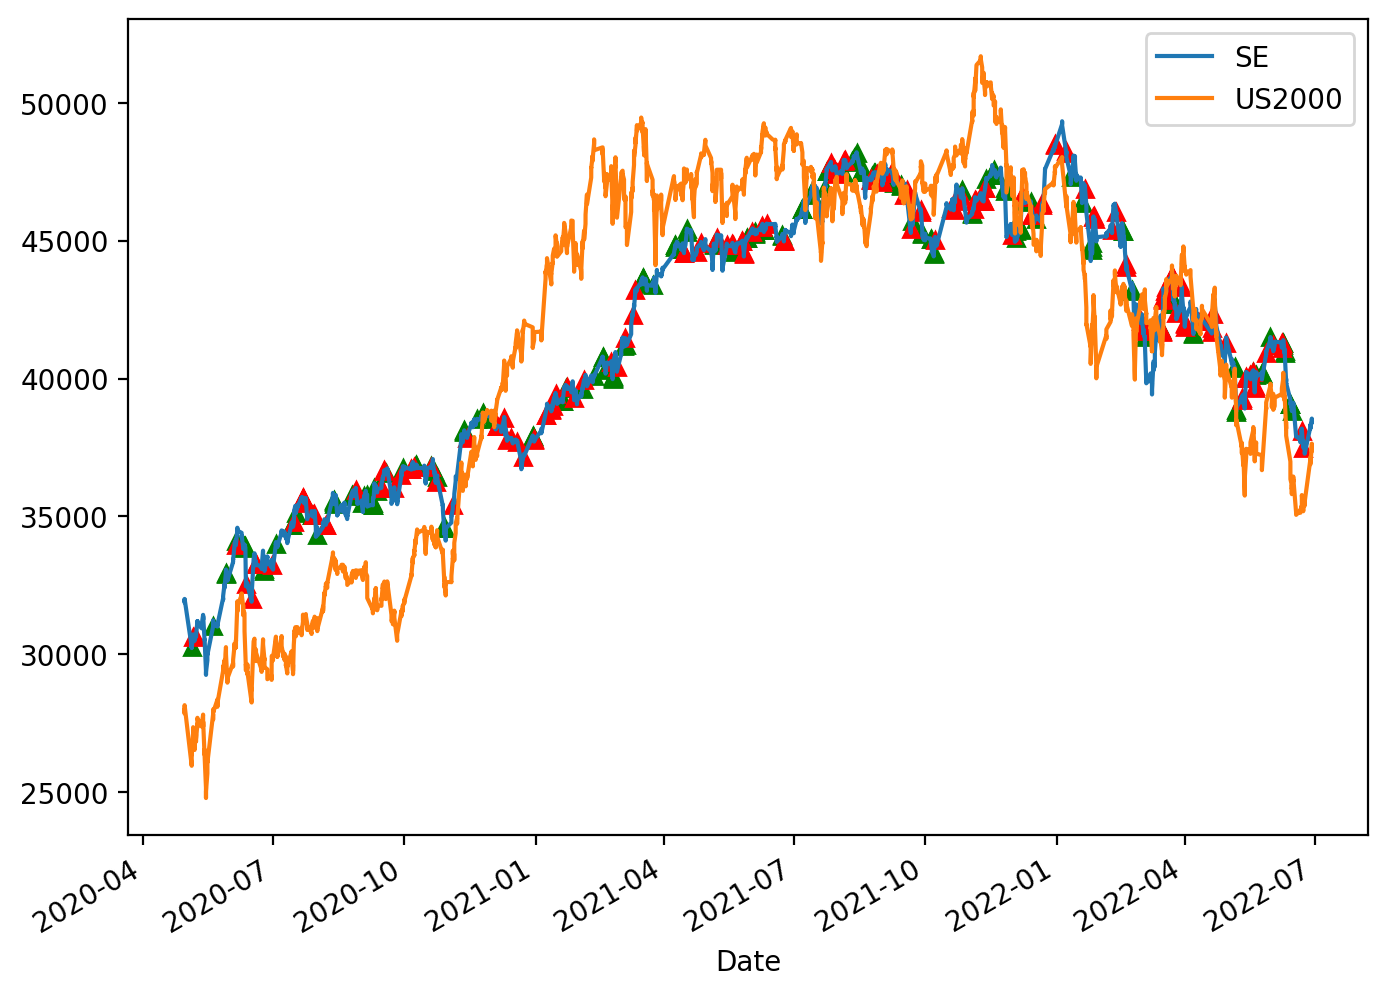

In [34]:
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=200)
MIDDE = test['MIDDE60']
SE = test['SE30']*20
US2000 = test['US2000']*21 # 16 to match with SE
buy = (ratio.copy()-lowerband.copy())<0
sell = (ratio.copy() - upperband.copy())>0
buy.loc[buy == False] = None
sell.loc[sell == False] = None
buy.loc[buy == True] = SE
sell.loc[sell == True] = SE
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
# NETH = test['NETH25']*50
# SE = test['CHINA50'] 
# HOWEVER, let's check out the relationship between the stocks...
# plt.plot(MIDDE, label = "MIDDE")
plt.plot(SE, label = "SE")
plt.plot(US2000, label = "US2000")
plt.legend()

In [44]:
monthly = ratio.resample('M').last()
monthly

2020-04-30    0.879693
2020-05-31    0.891685
2020-06-30    0.900521
2020-07-31    0.900782
2020-08-31    0.925539
2020-09-30    0.868097
2020-10-31    0.943507
2020-11-30    1.000053
2020-12-31    1.104229
2021-01-31    1.135834
2021-02-28    1.138458
2021-03-31    1.033986
2021-04-30    1.081609
2021-05-31    1.057590
2021-06-30    1.066025
2021-07-31    0.992961
2021-08-31    1.012664
2021-09-30    1.037851
2021-10-31    1.052666
2021-11-30    1.028337
2021-12-31    0.983506
2022-01-31    0.895705
2022-02-28    1.015539
2022-03-31    1.048958
2022-04-30    0.974109
2022-05-31    0.948493
2022-06-30    0.975752
Freq: M, dtype: float64

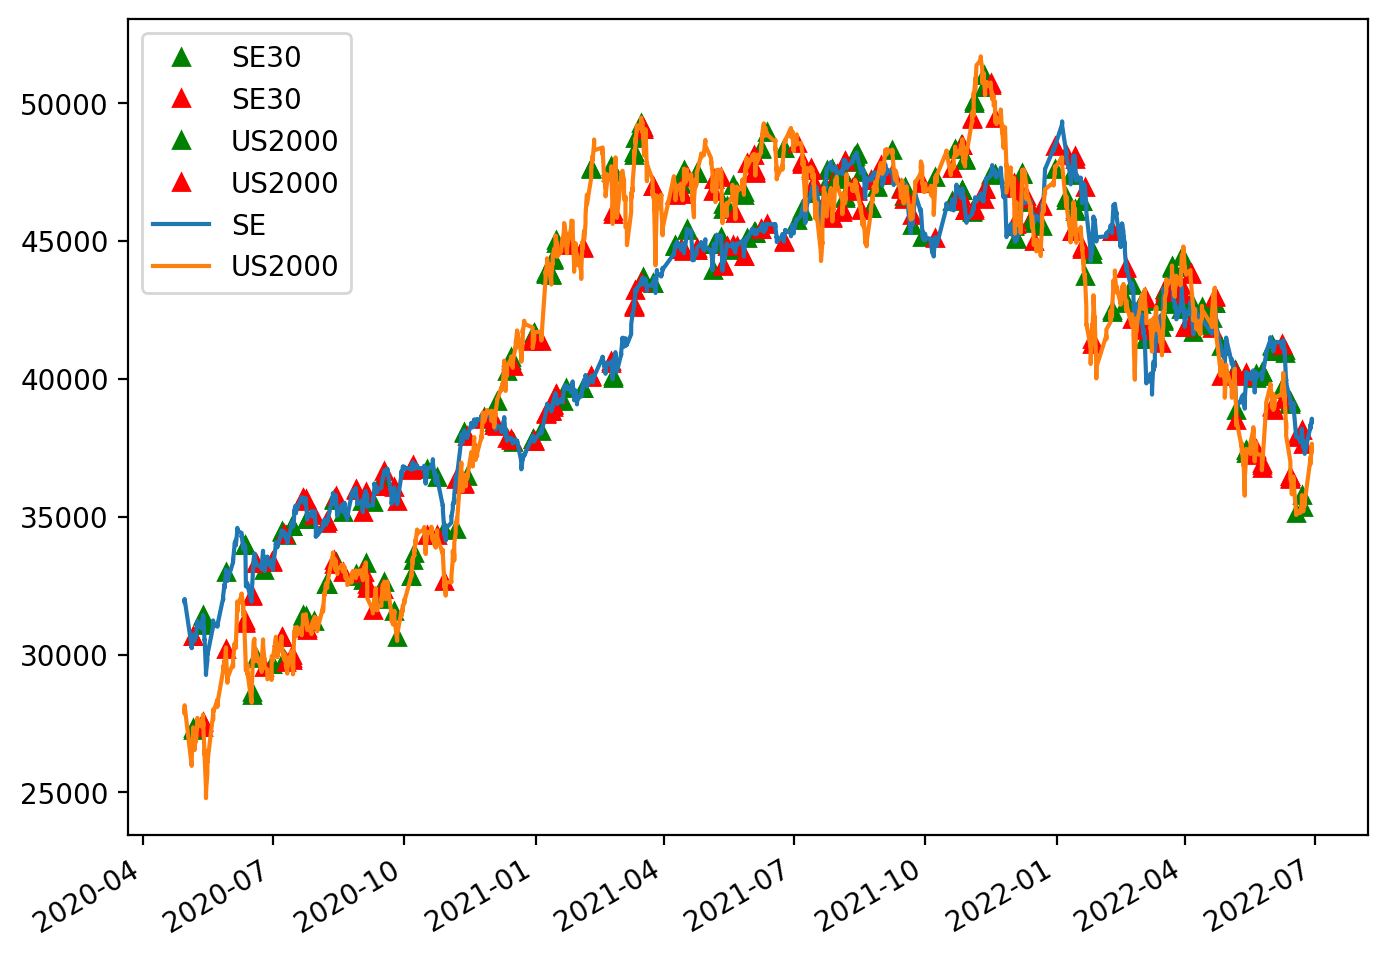

In [37]:
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=200)

SE = test['SE30']*20
US2000 = test['US2000']*21 # 16 to match with SE
# buy = (ratio.copy()-lowerband.copy())<0
# sell = (ratio.copy() - upperband.copy())>0
# buy.loc[buy == False] = None
# sell.loc[sell == False] = None
# buy.loc[buy == True] = SE
# sell.loc[sell == True] = SE
buy = SE.copy()
sell  = SE.copy()
buy[zscore_20_5>-1.5] = None
sell[zscore_20_5<1.5] = None
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')

buy2 = US2000.copy()
sell2  = US2000.copy()
buy2[zscore_20_5<1.5] = None
sell2[zscore_20_5>-1.5] = None
buy2.plot(color='g', linestyle='None', marker='^')
sell2.plot(color='r', linestyle='None', marker='^')

# NETH = test['NETH25']*50
# SE = test['CHINA50'] 
# HOWEVER, let's check out the relationship between the stocks...
# plt.plot(MIDDE, label = "MIDDE")
plt.plot(SE, label = "SE")
plt.plot(US2000, label = "US2000")
plt.legend()